# THEMATISCHE ZUORDNUNG

## Automatisch mittels Schlüsselwörtern

In [ ]:
import pandas as pd
import re

# Datei einlesen
file_path = "/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/sprechakte_protestdiskurs.xlsx"  
# Excel-Datei als DataFrame laden
df = pd.read_excel(file_path, engine="openpyxl")

# Themen definieren
themes = {
    'Kritik an Korruption und Machtmissbrauch': [],
    'Forderung nach Rechtsstaatlichkeit und Verfassungstreue': [],
    'Kritik an Misswirtschaft und Arbeitsbedingungen': [],
    'Medien- und Wahrheitskritik': [],
    'Moralische und ethische Appelle': [],
    'Solidaritätsbekundungen': [],
    'Machtentzug und Selbstermächtigung': []
}

# Wörterlisten für jedes Thema
keywords = {
    'Kritik an Korruption und Machtmissbrauch': [
        'коруп', 'неправд', 'непоштен', 'bogaćenj', 'убиj', 'машинери', 'прода', 'мафиj',
        'крв', 'газе', 'зло', 'крив', 'владали најгори', 'списак'
    ],
    'Forderung nach Rechtsstaatlichkeit und Verfassungstreue': [
        'прав', 'закон', 'устав', 'суд', 'тужил', 'крив', 'одгов', 'odgov'
    ],
    'Kritik an Misswirtschaft und Arbeitsbedingungen': [
        'економ', 'тигар', 'инфлациј', 'тонемо', 'кризис', 'рад', 'rad', 'инжењер', 'поправља',
        'машинц', 'пере', 'plat', 'pos'
    ],
    'Medien- und Wahrheitskritik': [
        'лаж', 'истин', 'медиј', 'цензур', 'ћут', 'pink', 'rts', 'happy', 'prva', 'говор', 'знањ',
        'тишин', 'falšir'
    ],
    'Moralische und ethische Appelle': [
        'морал', 'етич', 'част', 'достојанств', 'савест', 'душ', 'срц', 'емпатиј', 'трп',
        'правед', 'неартистич', 'уметнич'
    ],
    'Solidaritätsbekundungen': [
        'солидар', 'заједн', 'уз студент', 'уз вас', 'never walk alone', 'support', 'подрж',
        'један за све', 'све за једног', 'професор', 'учитељ', 'наставни', 'хероj'
    ],
    'Machtentzug und Selbstermächtigung': [
        'крај', 'пад', 'револуциј', 'слобод', 'будућност', 'пук', 'руш',
        'блок', 'испит', 'снаг', 'отпор', 'борб', 'живот', 'млад', 'памтићемо'
    ]
}

# prüfen, ob ein Text Schlüsselwörter enthält
def contains_keyword(text, keyword_list):
    if not isinstance(text, str):
        return False
    text = text.lower()
    return any(kw.lower() in text for kw in keyword_list)

#  Themen zuordnen
assigned_themes = {}

for index, row in df.iterrows():
    # Kombiniere Slogan und Inferenz 
    slogan = str(row.get('slogan', '')) if not pd.isna(row.get('slogan', '')) else ''
    inferenz = str(row.get('inferenz', '')) if not pd.isna(row.get('inferenz', '')) else ''
    content = f"{slogan} {inferenz}"
    
    # alle Themenbereiche durchlaufen
    assigned = False
    
    # Prioritätsbasierte Zuordnung basierend auf Spalte "Inferenz"
    if any(term in inferenz.lower() for term in ['korrupt', 'nepotismus', 'мафиj', 'крв', 'убиj', 'machtmissbrauch']):
        themes['Kritik an Korruption und Machtmissbrauch'].append(row)
        assigned_themes[index] = 'Kritik an Korruption und Machtmissbrauch'
        assigned = True
    elif any(term in inferenz.lower() for term in ['rechtsstaat', 'verfassung', 'gesetz', 'gerechtigkeit', 'justiz', 'wahrheit']):
        themes['Forderung nach Rechtsstaatlichkeit und Verfassungstreue'].append(row)
        assigned_themes[index] = 'Forderung nach Rechtsstaatlichkeit und Verfassungstreue'
        assigned = True
    elif any(term in inferenz.lower() for term in ['wirtschaft', 'arbeit', 'ungerecht', 'ehrlich', 'bereicherung', 'ökonom']):
        themes['Kritik an Misswirtschaft und Arbeitsbedingungen'].append(row)
        assigned_themes[index] = 'Kritik an Misswirtschaft und Arbeitsbedingungen'
        assigned = True
    elif any(term in inferenz.lower() for term in ['medi', 'zensur', 'lüg', 'schweig', 'information', 'wissen']):
        themes['Medien- und Wahrheitskritik'].append(row)
        assigned_themes[index] = 'Medien- und Wahrheitskritik'
        assigned = True
    elif any(term in inferenz.lower() for term in ['moral', 'ethisch', 'menschlich', 'gedenken', 'empathie']):
        themes['Moralische und ethische Appelle'].append(row)
        assigned_themes[index] = 'Moralische und ethische Appelle'
        assigned = True
    elif any(term in inferenz.lower() for term in ['solidarität', 'unterstütz', 'zusammenhalt', 'solidaritätsbekundung']):
        themes['Solidaritätsbekundungen'].append(row)
        assigned_themes[index] = 'Solidaritätsbekundungen'
        assigned = True
    elif any(term in inferenz.lower() for term in ['selbstermächtigung', 'fall', 'zerstör', 'sturz', 'kontrolle', 'widerstand', 'revolution', 'systemänderung', 'widerspruch']):
        themes['Machtentzug und Selbstermächtigung'].append(row)
        assigned_themes[index] = 'Machtentzug und Selbstermächtigung'
        assigned = True
    
    # Falls keine direkte Zuordnung durch die Inferenz, versuche es mit Schlüsselwörtern
    if not assigned:
        for theme, keyword_list in keywords.items():
            if contains_keyword(content, keyword_list):
                themes[theme].append(row)
                assigned_themes[index] = theme
                assigned = True
                break
    
    # Wenn immer noch keine Zuordnung, manuelle Einzelfallprüfung 
    if not assigned:
        # Spezialprüfungen für schwer zuzuordnende Slogans
        if 'Захтеви су ясни' in slogan:
            themes['Machtentzug und Selbstermächtigung'].append(row)
            assigned_themes[index] = 'Machtentzug und Selbstermächtigung'
        elif 'студент' in slogan or 'Vivat academia' in slogan:
            themes['Solidaritätsbekundungen'].append(row)
            assigned_themes[index] = 'Solidaritätsbekundungen'
        elif 'савест' in slogan or 'Slobod' in slogan:
            themes['Moralische und ethische Appelle'].append(row)
            assigned_themes[index] = 'Moralische und ethische Appelle'
        elif 'Dijalog' in slogan:
            themes['Kritik an Korruption und Machtmissbrauch'].append(row)
            assigned_themes[index] = 'Kritik an Korruption und Machtmissbrauch'
        else:
            # letztes Mittel: Umfeld
            urb_raum = str(row.get('urb_raum', '')) if not pd.isna(row.get('urb_raum', '')) else ''
            if 'vor dem Gebäude der Staatsanwaltschaft' in urb_raum:
                themes['Forderung nach Rechtsstaatlichkeit und Verfassungstreue'].append(row)
                assigned_themes[index] = 'Forderung nach Rechtsstaatlichkeit und Verfassungstreue'
            elif 'vor dem Gebäude der juristischen Fakultät' in urb_raum:
                themes['Forderung nach Rechtsstaatlichkeit und Verfassungstreue'].append(row)
                assigned_themes[index] = 'Forderung nach Rechtsstaatlichkeit und Verfassungstreue'
            elif 'vor dem Büro der SNS' in urb_raum:
                themes['Kritik an Korruption und Machtmissbrauch'].append(row)
                assigned_themes[index] = 'Kritik an Korruption und Machtmissbrauch'
            else:
                # Wenn immer noch keine Zuordnung: Kategorie mit häufigster Zuordnung bei ähnlichen Slogans
                themes['Machtentzug und Selbstermächtigung'].append(row)
                assigned_themes[index] = 'Machtentzug und Selbstermächtigung'

# Anzahl der Slogans pro Thema
theme_counts = {theme: len(slogans) for theme, slogans in themes.items()}

# Themen nach Anzahl der Slogans (absteigend)
sorted_themes = sorted(theme_counts.items(), key=lambda x: x[1], reverse=True)

# Ausgabe: Themenverteilung
print("Themenverteilung der Slogans (absteigend sortiert):")
for theme, count in sorted_themes:
    print(f"{theme}: {count} Slogans ({count/len(df)*100:.1f}%)")

# Ausgabe: Beispiele für jedes Thema
print("\nBeispiele für jedes Thema:")
for theme, count in sorted_themes:
    print(f"\n{theme} ({count} Slogans):")
    # Zeige bis zu 3 Beispiele pro Thema
    examples = themes[theme][:3]
    for i, row in enumerate(examples):
        slogan = str(row.get('slogan', '')) if not pd.isna(row.get('slogan', '')) else ''
        inferenz = str(row.get('inferenz', '')) if not pd.isna(row.get('inferenz', '')) else 'Keine Inferenz'
        print(f"  {i+1}. \"{slogan}\" - {inferenz}")

# Gesamtstatistik
total_assigned = sum(theme_counts.values())
print(f"\nGesamtzahl der zugeordneten Slogans: {total_assigned}")
print(f"Gesamtzahl der Slogans im Datensatz: {len(df)}")

# Optional: Füge dem DataFrame die Themenzuordnung hinzu und speichere als neue Datei
df['theme'] = df.index.map(assigned_themes)

# Speichern
# df.to_csv('protest_serbia_with_themes.csv', index=False)

Themenverteilung der Slogans (absteigend sortiert):
Machtentzug und Selbstermächtigung: 62 Slogans (41.3%)
Solidaritätsbekundungen: 23 Slogans (15.3%)
Forderung nach Rechtsstaatlichkeit und Verfassungstreue: 19 Slogans (12.7%)
Kritik an Korruption und Machtmissbrauch: 17 Slogans (11.3%)
Medien- und Wahrheitskritik: 13 Slogans (8.7%)
Kritik an Misswirtschaft und Arbeitsbedingungen: 11 Slogans (7.3%)
Moralische und ethische Appelle: 5 Slogans (3.3%)

Beispiele für jedes Thema:

Machtentzug und Selbstermächtigung (62 Slogans):
  1. "Захтеви су ясни, реакциjа вам касни!" - verspätete Reaktion → Ignoranz, Inkompetenz
  2. "Машинци против машинериjе" - Maschinerie → repressives System, Automatisierung, technokratische Kontrolle
  3. "10 от 10 дерматолога препоручуjе да будете у хладу." - Bild-Text-Interferenz: Das Plakat ist begleitet von einer Graphik, die Menschen außerhalb von Gebäuden zeigt – kann sich an die Bürger richten ("Geht auf die Straße!") oder an die Regierung ("Raus aus dem Pa

### Visualisierung

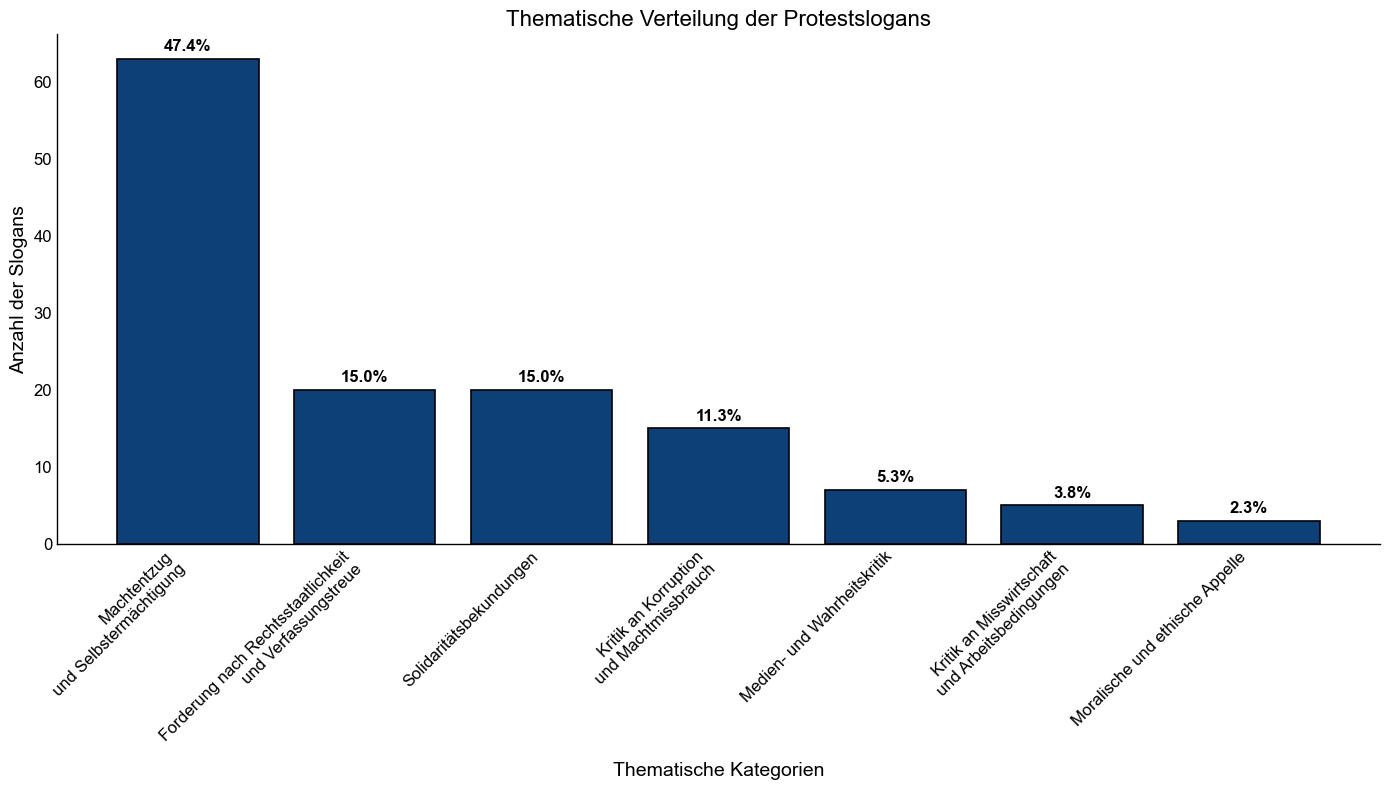


Thematische Verteilung der Protestslogans:


,Thema,Anzahl,Prozent
0,Machtentzug und Selbstermächtigung,63,47.4%
1,Forderung nach Rechtsstaatlichkeit und Verfassungstreue,20,15.0%
2,Solidaritätsbekundungen,20,15.0%
3,Kritik an Korruption und Machtmissbrauch,15,11.3%
4,Medien- und Wahrheitskritik,7,5.3%
5,Kritik an Misswirtschaft und Arbeitsbedingungen,5,3.8%
6,Moralische und ethische Appelle,3,2.3%


Gesamt: 133 Slogans (100%)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plots
plt.style.use('seaborn-v0_8-whitegrid')

# Daten für die thematische Analyse
themes_data = {
    'Machtentzug\nund Selbstermächtigung': 63,
    'Forderung nach Rechtsstaatlichkeit\nund Verfassungstreue': 20,
    'Solidaritätsbekundungen': 20,
    'Kritik an Korruption\nund Machtmissbrauch': 15,
    'Medien- und Wahrheitskritik': 7,
    'Kritik an Misswirtschaft\nund Arbeitsbedingungen': 5,
    'Moralische und ethische Appelle': 3
}

# Daten in ein DataFrame umwandeln und für die Visualisierung vorbereiten
df_themes = pd.DataFrame({
    'Thema': list(themes_data.keys()),
    'Anzahl': list(themes_data.values())
}).sort_values(by='Anzahl', ascending=False)

# Prozentwerte berechnen
total = df_themes['Anzahl'].sum()
df_themes['Prozent'] = (df_themes['Anzahl'] / total) * 100

# Farben 
colors = ["#0C4076",]

# Balkendiagramm 
plt.figure(figsize=(14, 8))

bars = plt.bar(
    df_themes['Thema'],
    df_themes['Anzahl'],
    color=colors[:len(df_themes)], 
    edgecolor="black", 
    linewidth=1.2
)

# Beschriftung der Balken mit Prozentwerten
for bar, value in zip(bars, df_themes['Prozent']):
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height() + 1, 
        f"{value:.1f}%",
        ha="center", 
        fontsize=12, 
        color="black", 
        fontweight="bold"
    )

# Achsen und Titel
plt.xticks(rotation=45, ha="right", fontsize=12, color="black")
plt.yticks(fontsize=12, color="black")
plt.title("Thematische Verteilung der Protestslogans", fontsize=16, color="black")
plt.xlabel("Thematische Kategorien", fontsize=14, color="black")
plt.ylabel("Anzahl der Slogans", fontsize=14, color="black")

# Diagrammrahmen anpassen
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("black")
plt.gca().spines["bottom"].set_color("black")

# Layout optimieren
plt.tight_layout()

# Raster
plt.grid(False)

plt.show()

# Tabelle
from IPython.display import display
print("\nThematische Verteilung der Protestslogans:")
display(df_themes[['Thema', 'Anzahl', 'Prozent']].style.format({'Prozent': '{:.1f}%'}))
print(f"Gesamt: {total} Slogans (100%)")

# TOPIC MODELING

## Scraping von Protestografija

In [ ]:
import requests
import pandas as pd

# API-URL
base_url = "https://api.protestografija.cloud/photos?search=&sort=date&skip={}&limit=30"

# Alle gesammelten Daten
all_data = []
page = 0

while True:
    url = base_url.format(page * 30)
    print(f"Hole Seite {page + 1} …")
    response = requests.get(url)

    if response.status_code != 200:
        print("Fehler beim Abruf:", response.status_code)
        print(response.text[:200])
        break

    try:
        data = response.json()
    except Exception as e:
        print("Fehler beim Parsen der JSON-Antwort:", e)
        break

    if not data:
        print("Keine weiteren Daten.")
        break

    for item in data:
        all_data.append({
            "ID": item.get("id"),
            "Titel": item.get("title"),
            "Text": item.get("text_content"),
            "Kategorie": item.get("category"),
            "Ort": item.get("location_text"),
            "Stichworte": ", ".join(item.get("keywords", [])),
            "Bild": f"https://api.protestografija.cloud{item.get('image_url')}",
            "Thumbnail": f"https://api.protestografija.cloud{item.get('thumbnail_url')}",
            "Erstellt am": item.get("created_at")
        })

    page += 1

# In DataFrame umwandeln
df = pd.DataFrame(all_data)

print(f"\n {len(df)} Einträge geladen.")
print(df.head())

# als CSV speichern
df.to_csv("plakatdaten.csv", index=False, encoding="utf-8")


Hole Seite 1 …
Hole Seite 2 …
Hole Seite 3 …
Hole Seite 4 …
Hole Seite 5 …
Hole Seite 6 …
Hole Seite 7 …
Hole Seite 8 …
Hole Seite 9 …
Hole Seite 10 …
Hole Seite 11 …
Hole Seite 12 …
Hole Seite 13 …
Hole Seite 14 …
Hole Seite 15 …
Hole Seite 16 …
Hole Seite 17 …
Hole Seite 18 …
Hole Seite 19 …
Hole Seite 20 …
Hole Seite 21 …
Hole Seite 22 …
Hole Seite 23 …
Hole Seite 24 …
Hole Seite 25 …
Hole Seite 26 …
Hole Seite 27 …
Hole Seite 28 …
Hole Seite 29 …
Hole Seite 30 …
Hole Seite 31 …
Hole Seite 32 …
Hole Seite 33 …
Hole Seite 34 …
Hole Seite 35 …
Hole Seite 36 …
Hole Seite 37 …
Hole Seite 38 …
Hole Seite 39 …
Hole Seite 40 …
Hole Seite 41 …
Hole Seite 42 …
Hole Seite 43 …
Hole Seite 44 …
Hole Seite 45 …
Hole Seite 46 …
Hole Seite 47 …
Hole Seite 48 …
Hole Seite 49 …
Hole Seite 50 …
Hole Seite 51 …
Hole Seite 52 …
Hole Seite 53 …
Hole Seite 54 …
Hole Seite 55 …
Hole Seite 56 …
Hole Seite 57 …
Hole Seite 58 …
Hole Seite 59 …
Hole Seite 60 …
Hole Seite 61 …
Hole Seite 62 …
Hole Seite 63 …
H

### Zusammenführung der Kategorien "Titel" und "Text" zu "Inhalt"

In [2]:
import pandas as pd

# CSV-Datei mit den Originaldaten laden
df = pd.read_csv("/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/plakatdaten.csv")

# Inhaltsspalte erzeugen: wenn Text vorhanden ist, verwende ihn; sonst den Titel
df["Inhalt"] = df.apply(
    lambda row: row["Text"] if pd.notnull(row["Text"]) and isinstance(row["Text"], str) and row["Text"].strip()
    else row["Titel"],
    axis=1
)

# Speichern der aktualisierten Datei (optional)
df.to_csv("/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/plakatdaten_mit_inhalt.csv",
          index=False, encoding="utf-8")

# Erste Zeilen anzeigen zur Kontrolle
print(df[["Titel", "Text", "Inhalt"]].head())

                                               Titel  \
0                        TETKA IZ BEČA ČEKA STUDENTE   
1  A MOGLI SMO SE VOLETI I GLEDATI ŠAROVIĆA AL' T...   
2  Bež'te, stižu Resavci! Korupcija, nepravda, iz...   
3    OPREZ! ŽIVOTINJE SU OPASNE I ZAVIJAJU NA PRAVDU   
4  Nisam student a nisam ni rulja. Ja sam čovek a...   

                                                Text  \
0                        TETKA IZ BEČA ČEKA STUDENTE   
1  A MOGLI SMO SE VOLETI I GLEDATI ŠAROVIĆA AL' T...   
2  Bež'te, stižu Resavci! Korupcija, nepravda, iz...   
3    OPREZ! ŽIVOTINJE SU OPASNE I ZAVIJAJU NA PRAVDU   
4  Nisam student a nisam ni rulja. Ja sam čovek a...   

                                              Inhalt  
0                        TETKA IZ BEČA ČEKA STUDENTE  
1  A MOGLI SMO SE VOLETI I GLEDATI ŠAROVIĆA AL' T...  
2  Bež'te, stižu Resavci! Korupcija, nepravda, iz...  
3    OPREZ! ŽIVOTINJE SU OPASNE I ZAVIJAJU NA PRAVDU  
4  Nisam student a nisam ni rulja. Ja sam čovek a..

### Daten bereinigen

In [ ]:
import stanza
stanza.download("sr")
nlp = stanza.Pipeline("sr")


2025-05-17 20:21:59 INFO: Downloading default packages for language: sr (Serbian) ...
2025-05-17 20:21:59 INFO: File exists: /Users/annajouravel/stanza_resources/sr/default.zip
2025-05-17 20:22:02 INFO: Finished downloading models and saved to /Users/annajouravel/stanza_resources.
2025-05-17 20:22:02 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2025-05-17 20:22:03 INFO: Loading these models for language: sr (Serbian):
| Processor | Package |
-----------------------
| tokenize  | set     |
| pos       | set     |
| lemma     | set     |
| depparse  | set     |

2025-05-17 20:22:03 INFO: Use device: cpu
2025-05-17 20:22:03 INFO: Loading: tokenize
2025-05-17 20:22:03 INFO: Loading: pos
2025-05-17 20:22:04 INFO: Loading: lemma
2025-05-17 20:22:04 INFO: Loading: depparse
2025-05-17 20:22:04 INFO: Done loading processors!


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annajouravel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import pandas as pd
from transliterate import translit
import re
import nltk
from nltk.corpus import stopwords

# NLTK-Stopwords laden
nltk.download('stopwords')

# Serbische Stopwörter laden
stopword_pfad = "/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/stopwords-hr.txt"
with open(stopword_pfad, "r", encoding="utf-8") as f:
    stopwords_sr = set(line.strip().lower() for line in f if line.strip())

# Englische Stopwörter laden
stopwords_en = set(stopwords.words("english"))

# Kombination beider Listen
stopwords_kombi = stopwords_sr.union(stopwords_en)

# CSV mit vorbereiteter 'Inhalt'-Spalte laden
df = pd.read_csv("/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/plakatdaten_mit_inhalt.csv")

def bereinige_text(text):
    if pd.isnull(text):
        return ""
    # Transliteration (kyrillisch → lateinisch)
    text = translit(str(text), "sr", reversed=True)

    # Kleinschreibung
    text = text.lower()

    # URLs entfernen
    text = re.sub(r"http\S+", "", text)

    # Satzzeichen entfernen
    text = re.sub(r"[^\w\s]", "", text)

    # Tokenisierung & Stopwortfilterung
    tokens = text.split()
    tokens = [t for t in tokens if t not in stopwords_kombi and len(t) > 2]

    return " ".join(tokens)

# Bereinigung anwenden
df["Inhalt_bereinigt"] = df["Inhalt"].apply(bereinige_text)

# Speichern
df.to_csv("/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/plakatdaten_bereinigt.csv",
          index=False, encoding="utf-8")

# Erste Zeilen anzeigen
print(df[["Titel", "Inhalt", "Inhalt_bereinigt"]].head())



                                               Titel  \
0                        TETKA IZ BEČA ČEKA STUDENTE   
1  A MOGLI SMO SE VOLETI I GLEDATI ŠAROVIĆA AL' T...   
2  Bež'te, stižu Resavci! Korupcija, nepravda, iz...   
3    OPREZ! ŽIVOTINJE SU OPASNE I ZAVIJAJU NA PRAVDU   
4  Nisam student a nisam ni rulja. Ja sam čovek a...   

                                              Inhalt  \
0                        TETKA IZ BEČA ČEKA STUDENTE   
1  A MOGLI SMO SE VOLETI I GLEDATI ŠAROVIĆA AL' T...   
2  Bež'te, stižu Resavci! Korupcija, nepravda, iz...   
3    OPREZ! ŽIVOTINJE SU OPASNE I ZAVIJAJU NA PRAVDU   
4  Nisam student a nisam ni rulja. Ja sam čovek a...   

                                    Inhalt_bereinigt  
0                           tetka beča čeka studente  
1                mogli voleti gledati šarovića glupa  
2  bežte stižu resavci korupcija nepravda izdajni...  
3             oprez životinje opasne zavijaju pravdu  
4                          student rulja čovek hulj

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annajouravel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Lemmatisierung

In [6]:
def lemmatisiere_text(text):
    if pd.isnull(text):
        return ""
    doc = nlp(text)
    lemmata = [word.lemma for sent in doc.sentences for word in sent.words]
    return " ".join(lemmata)


In [7]:
# Lemmatisierung anwenden auf die bereits bereinigte Spalte
df["Inhalt_lemmatisiert"] = df["Inhalt_bereinigt"].apply(lemmatisiere_text)

# Als neue Datei speichern: bereinigt + lemmatisiert
df.to_csv("/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/plakatdaten_bereinigt_und_lemmatisiert.csv",
          index=False, encoding="utf-8")

# Kontrolle: erste Zeilen anzeigen
print(df[["Inhalt_bereinigt", "Inhalt_lemmatisiert"]].head())




                                    Inhalt_bereinigt  \
0                           tetka beča čeka studente   
1                mogli voleti gledati šarovića glupa   
2  bežte stižu resavci korupcija nepravda izdajni...   
3             oprez životinje opasne zavijaju pravdu   
4                          student rulja čovek hulja   

                                 Inhalt_lemmatisiert  
0                           tetak beč čekati student  
1                  moći voleti gledati šarović glupa  
2  bežta stizati resavac korupcija nepravda izdaj...  
3             oprez životinja opasan zavijati pravda  
4                           student rulja čovek hulj  


### Laden des bereinigten und lemmatisierten Korpus, Vektorisierung mit CountVectorizer, Training des LDA-Modells mit 10 Topics, Ausgabe der Top-Wörter pro Topic


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Neue Datei mit Lemmata laden
df = pd.read_csv("/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/plakatdaten_bereinigt_und_lemmatisiert.csv")

# Nur sinnvoll lange Slogans verwenden
texte = df["Inhalt_lemmatisiert"].dropna()
texte = texte[texte.str.strip().str.len() > 10]

# Vektorisierung (Bag-of-Words)
vectorizer = CountVectorizer(max_df=0.95, min_df=5)
X = vectorizer.fit_transform(texte)

# LDA-Modell trainieren
lda = LatentDirichletAllocation(n_components=7, random_state=42)
lda.fit(X)

# Top-Wörter je Thema anzeigen
def zeige_top_wörter(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nThema {topic_idx+1}:")
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(", ".join(top_features))

zeige_top_wörter(lda, vectorizer.get_feature_names_out())

# Themenverteilung je Dokument berechnen
topic_dist = lda.transform(X)
df_topics = pd.DataFrame(topic_dist, columns=[f"Thema {i+1}" for i in range(lda.n_components)], index=texte.index)

# Mit Originaldaten verbinden
df_result = df.join(df_topics)
df_result["dominantes_thema"] = df_topics.idxmax(axis=1)

# Speichern
df_result.to_csv("/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/plakatdaten_themen.csv", index=False)



Thema 1:
pravda, čovek, korupcija, čuti, put, štrajk, niš, student, biti, kad

Thema 2:
ovaj, vreme, svaki, bez, ulica, zakon, blokirati, šta, dok, ljubav

Thema 3:
zahtev, imati, mnogo, ispuniti, škola, neko, sistem, jedan, korupcija, zbog

Thema 4:
biti, znati, sloboda, trebati, dobar, baba, svet, lažiti, dati, vlast

Thema 5:
moći, blokada, studentski, nov, misliti, sad, sada, učiti, bre, strana

Thema 6:
student, deca, danas, država, kad, pumpaj, mama, ćak, morati, mnogo

Thema 7:
srbija, ruka, život, doći, budućnost, gde, čas, ići, krvava, ustav


In [14]:
# Dataframe aus Themen machen und Themen zuweisen
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Pfad zur bereinigten Datei
pfad = "/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/plakatdaten_bereinigt_und_lemmatisiert.csv"

# Bereinigte Daten laden
df = pd.read_csv(pfad)

# Texte extrahieren
texte = df["Inhalt_lemmatisiert"].dropna()
texte = texte[texte.str.strip().str.len() > 10] # Ausschluss zu kurzer Slogans

# Vektorisierung (Bag-of-Words-Modell)
vectorizer = CountVectorizer(max_df=0.95, min_df=5)
X = vectorizer.fit_transform(texte)

# LDA-Modell definieren und trainieren
lda = LatentDirichletAllocation(n_components=7, random_state=42)
lda.fit(X)

# Themenverteilung für jedes Dokument berechnen
topic_distribution = lda.transform(X)

# In DataFrame umwandeln
topic_df = pd.DataFrame(topic_distribution, columns=[f"Thema {i+1}" for i in range(lda.n_components)])

# Mit Originaldaten zusammenführen
df_themen = df.reset_index(drop=True).join(topic_df)

# Dominantes Thema pro Plakat berechnen
df_themen["dominantes_thema"] = topic_df.idxmax(axis=1)

# Speichern 
df_themen.to_csv("/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/plakatdaten_themen.csv", index=False)

# Prüfen
print(df_themen[["Titel", "dominantes_thema"]].head())


                                               Titel dominantes_thema
0                        TETKA IZ BEČA ČEKA STUDENTE          Thema 1
1  A MOGLI SMO SE VOLETI I GLEDATI ŠAROVIĆA AL' T...          Thema 5
2  Bež'te, stižu Resavci! Korupcija, nepravda, iz...          Thema 1
3    OPREZ! ŽIVOTINJE SU OPASNE I ZAVIJAJU NA PRAVDU          Thema 1
4  Nisam student a nisam ni rulja. Ja sam čovek a...          Thema 4


In [35]:
# Feature-Namen aus dem Vektorizer holen
feature_names = vectorizer.get_feature_names_out()

# Funktion: Top-Wörter pro Thema als DataFrame
def top_wörter_dataframe(model, feature_names, n_top_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics[f"Thema {topic_idx+1}"] = top_features
    return pd.DataFrame.from_dict(topics, orient='index', columns=[f"Wort {i+1}" for i in range(n_top_words)])

# DataFrame erzeugen
df_topwords = top_wörter_dataframe(lda, feature_names, n_top_words=10)

# Ausgabe
print(df_topwords)


          Wort 1   Wort 2      Wort 3    Wort 4     Wort 5  Wort 6     Wort 7  \
Thema 1   pravda    čovek   korupcija      čuti        put  štrajk        niš   
Thema 2     ovaj    vreme       svaki       bez      ulica   zakon  blokirati   
Thema 3   zahtev    imati       mnogo  ispuniti      škola    neko     sistem   
Thema 4     biti    znati     sloboda   trebati      dobar    baba       svet   
Thema 5     moći  blokada  studentski       nov    misliti     sad       sada   
Thema 6  student     deca       danas    država        kad  pumpaj       mama   
Thema 7   srbija     ruka       život      doći  budućnost     gde        čas   

          Wort 8     Wort 9 Wort 10  
Thema 1  student       biti     kad  
Thema 2      šta        dok  ljubav  
Thema 3    jedan  korupcija    zbog  
Thema 4   lažiti       dati   vlast  
Thema 5    učiti        bre  strana  
Thema 6      ćak     morati   mnogo  
Thema 7      ići     krvava   ustav  


#### Visualisierung der LDA-Topwörter: Gewichtungen 

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Anzahl der Top-Wörter
n_top_words = 10

# Feature-Namen aus CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Speicherort festlegen
output_dir = "/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/protestdiskurs_serbien_latex/bilder"
os.makedirs(output_dir, exist_ok=True)

# Stil setzen
sns.set(style="whitegrid")

# Themenbasiertes Balkendiagramm (am stärksten gewichtete Wörter oben)
for topic_idx, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_indices]
    top_weights = topic[top_indices]

    df_plot = pd.DataFrame({
        "Wort": top_words,
        "Gewichtung": top_weights
    })

    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_plot, x="Gewichtung", y="Wort", palette="viridis")
    plt.title(f"LDA-Top-Wörter in Thema {topic_idx + 1}")
    plt.xlabel("Wortgewicht im Thema")
    plt.ylabel("Top-Wörter")
    plt.tight_layout()

    # Speichern
    base = f"lda_topwords_gewichtet_thema_{topic_idx + 1}"
    plt.savefig(os.path.join(output_dir, f"{base}.png"), dpi=300)
    plt.close()


/var/folders/d4/m904nxmj7xvfqv1b0w3gf8d40000gp/T/ipykernel_3774/2844969689.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x="Gewichtung", y="Wort", palette="viridis")
/var/folders/d4/m904nxmj7xvfqv1b0w3gf8d40000gp/T/ipykernel_3774/2844969689.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x="Gewichtung", y="Wort", palette="viridis")
/var/folders/d4/m904nxmj7xvfqv1b0w3gf8d40000gp/T/ipykernel_3774/2844969689.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x="Gewichtung", y="Wort", palet

#### Visualisierung Themenverteilung

/var/folders/d4/m904nxmj7xvfqv1b0w3gf8d40000gp/T/ipykernel_3774/2572755091.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


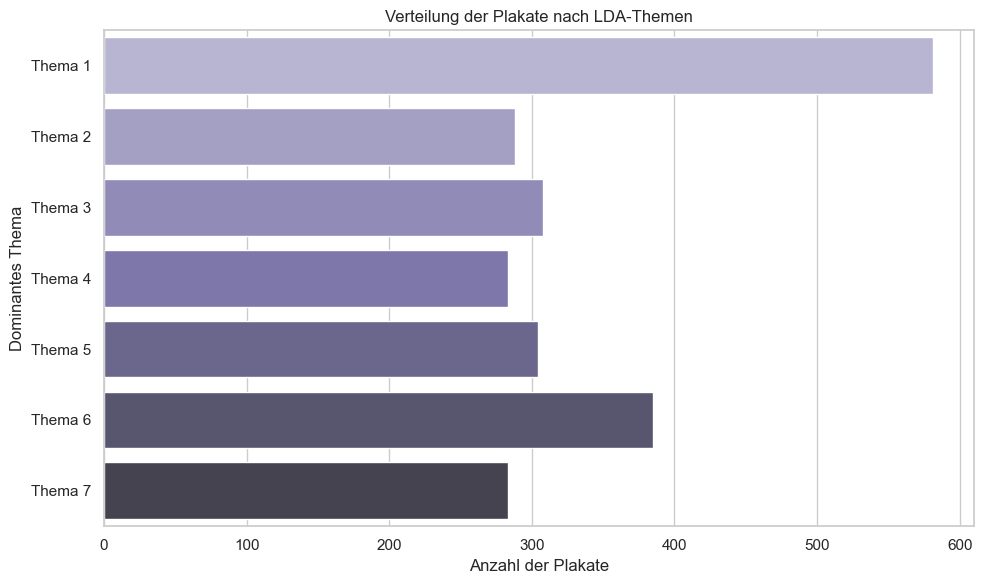

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Pfade
dateipfad = "/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/plakatdaten_themen.csv"
speicherpfad = "/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/protestdiskurs_serbien_latex/bilder"
os.makedirs(speicherpfad, exist_ok=True)

# CSV mit dominanten Themen laden
df = pd.read_csv(dateipfad)

# Themen zählen
lda_counts = df["dominantes_thema"].value_counts().reset_index()
lda_counts.columns = ["Thema", "Anzahl"]
lda_counts = lda_counts.sort_values("Thema")  # falls alphabetisch gewünscht

# Stil setzen
sns.set_style("whitegrid")

# Balkendiagramm
plt.figure(figsize=(10, 6))
sns.barplot(
    data=lda_counts,
    x="Anzahl",
    y="Thema",
    palette="Purples_d"
)
plt.title("Verteilung der Plakate nach LDA-Themen")
plt.xlabel("Anzahl der Plakate")
plt.ylabel("Dominantes Thema")
plt.tight_layout()

# Speichern
dateiname = "verteilung_lda_themen"
plt.savefig(f"{speicherpfad}/{dateiname}.png", format="png", dpi=300)

plt.show()


### Themenzuordnung Portal

In [16]:
import pandas as pd
import re
import unicodedata
from transliterate import translit

# Datei laden
df = pd.read_csv("/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/plakatdaten_mit_inhalt.csv")

# Transliteration, Kleinschreibung, Satzzeichenentfernung, Diakritika entfernen
def normalisiere(text):
    if pd.isnull(text):
        return ""
    
    # Transliteration
    text = translit(str(text), "sr", reversed=True)
    
    # Diakritika entfernen (č wird zu c, š zu s, usw.)
    text = ''.join(c for c in unicodedata.normalize('NFKD', text)
                  if not unicodedata.combining(c))
    
    # Kleinschreibung
    text = text.lower()
    
    # Satzzeichen entfernen
    text = re.sub(r"[^\w\s]", "", text)
    
    # Mehrfache Leerzeichen entfernen
    text = re.sub(r"\s+", " ", text).strip()
    
    return text

# Anwenden auf relevante Spalten
df["Kategorie_normiert"] = df["Kategorie"].apply(normalisiere)
df["Ort_normiert"] = df["Ort"].apply(normalisiere)
df["Stichworte_normiert"] = df["Stichworte"].apply(normalisiere)

# Speichern
df.to_csv("/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/plakatdaten_mit_inhalt_normiert.csv",
          index=False, encoding="utf-8")

# Kontrolle
print(df[["Kategorie", "Kategorie_normiert"]].drop_duplicates().head(100))

                           Kategorie              Kategorie_normiert
0                   socijalna pravda                socijalna pravda
1                  političke reforme               politicke reforme
5                        obrazovanje                     obrazovanje
12                   životna sredina                 zivotna sredina
18                  Socijalna pravda                socijalna pravda
33    socijalna pravda ljudska prava  socijalna pravda ljudska prava
34               prava na stanovanje             prava na stanovanje
37               rodna ravnopravnost             rodna ravnopravnost
58                  ekonomska pravda                ekonomska pravda
63               Rodna ravnopravnost             rodna ravnopravnost
80                      naučna etika                    naucna etika
119                    prava radnika                   prava radnika
168                      protiv rata                     protiv rata
227              zdravstvena zašti

In [17]:
# Anzahl Kategorien
import pandas as pd

# CSV laden 
df = pd.read_csv("/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/plakatdaten_mit_inhalt_normiert.csv")

# Anzahl unterschiedlicher Kategorien
anzahl_kategorien = df["Kategorie_normiert"].nunique(dropna=True)

# Ausgabe
print(f"Anzahl Kategorien: {anzahl_kategorien}")

Anzahl Kategorien: 21


In [18]:
# Liste der Kategorien 
print("Kategorien:")
print(df["Kategorie_normiert"].dropna().unique())

Kategorien:
['socijalna pravda' 'politicke reforme' 'obrazovanje' 'zivotna sredina'
 'socijalna pravda ljudska prava' 'prava na stanovanje'
 'rodna ravnopravnost' 'ekonomska pravda' 'naucna etika' 'prava radnika'
 'protiv rata' 'zdravstvena zastita' 'radnicka prava' 'politicka reforma'
 'ljudska prava' 'srednja pravda ljudska prava' 'prava zivotinja'
 'nepoznato' 'political reforms' 'mentalno zdravlje' 'ekoloski aktivizam']


In [55]:
# Fälle pro Kategorie
print(df["Kategorie_normiert"].value_counts())


socijalna pravda                  1005
politicke reforme                  927
obrazovanje                        393
zivotna sredina                    119
ljudska prava                       67
prava radnika                       63
socijalna pravda ljudska prava      63
ekonomska pravda                    39
protiv rata                         22
zdravstvena zastita                 20
rodna ravnopravnost                 16
politicka reforma                   15
prava na stanovanje                 14
prava zivotinja                      4
naucna etika                         1
radnicka prava                       1
srednja pravda ljudska prava         1
nepoznato                            1
political reforms                    1
mentalno zdravlje                    1
ekoloski aktivizam                   1
Name: Kategorie_normiert, dtype: int64


In [19]:
# Konsolidierung Kategorien

df = pd.read_csv("/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/plakatdaten_mit_inhalt_normiert.csv")

# Konsolidierungsregeln definieren
ersetzungen = {
    "political reforms": "političke reforme",
    "politicke reforme": "političke reforme",
    "politicka reforma": "političke reforme",
    "socijalna pravda ljudska prava": "socijalna pravda",
    "srednja pravda ljudska prava": "socijalna pravda",
    "radnicka prava": "prava radnika"
}

# Neue Spalte: konsolidierte Kategorie
df["Kategorie_konsolidiert"] = df["Kategorie_normiert"].replace(ersetzungen)

# Kategorien mit weniger als 5 Vorkommen entfernen
wert_counts = df["Kategorie_konsolidiert"].value_counts()
relevante_kategorien = wert_counts[wert_counts >= 5].index.tolist()

# Alles andere auf NaN setzen
df["Kategorie_konsolidiert"] = df["Kategorie_konsolidiert"].where(df["Kategorie_konsolidiert"].isin(relevante_kategorien))

# Ergebnis prüfen
print("Übrig gebliebene Kategorien:")
print(df["Kategorie_konsolidiert"].value_counts())

# Speichern
df.to_csv("/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/plakatdaten_mit_inhalt.csv",
          index=False, encoding="utf-8")


Übrig gebliebene Kategorien:
socijalna pravda       1069
političke reforme       943
obrazovanje             393
zivotna sredina         119
ljudska prava            67
prava radnika            64
ekonomska pravda         39
protiv rata              22
zdravstvena zastita      20
rodna ravnopravnost      16
prava na stanovanje      14
Name: Kategorie_konsolidiert, dtype: int64


### Visualisierung Verteilung der Kategorien

/var/folders/d4/m904nxmj7xvfqv1b0w3gf8d40000gp/T/ipykernel_3774/769003113.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


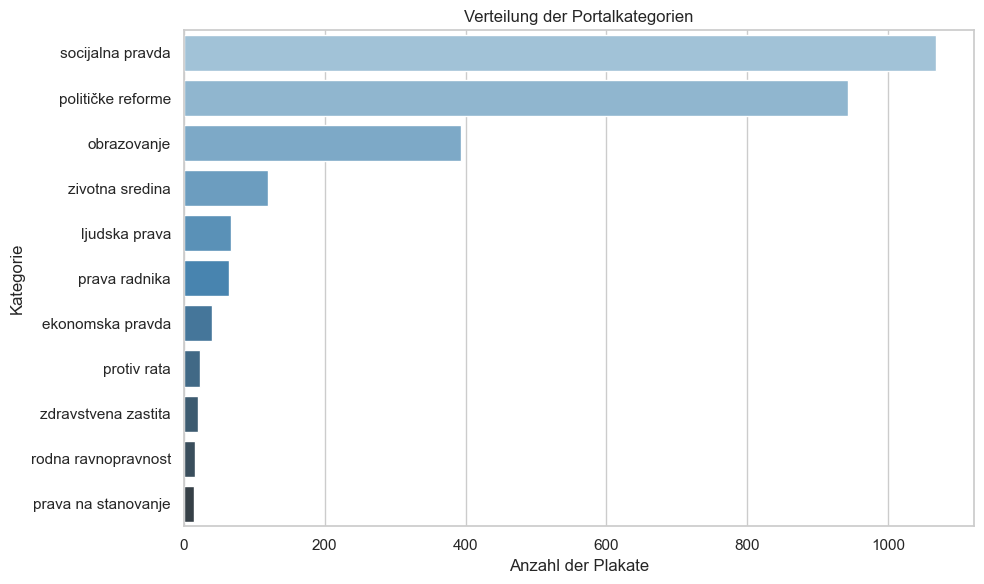

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# CSV laden
df = pd.read_csv("/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/plakatdaten_mit_inhalt.csv")

# Verzeichnis zum Speichern
speicherpfad = "/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/protestdiskurs_serbien_latex/bilder"
os.makedirs(speicherpfad, exist_ok=True)

# Kategorien zählen
kategorie_counts = df["Kategorie_konsolidiert"].value_counts().reset_index()
kategorie_counts.columns = ["Kategorie", "Anzahl"]

# Stil setzen
sns.set_style("whitegrid")

# Plot erstellen
plt.figure(figsize=(10, 6))
sns.barplot(
    data=kategorie_counts,
    x="Anzahl",
    y="Kategorie",
    palette="Blues_d"
)
plt.title("Verteilung der Portalkategorien")
plt.xlabel("Anzahl der Plakate")
plt.ylabel("Kategorie")
plt.tight_layout()

# Speichern
dateiname = "verteilung_portalkategorien"
plt.savefig(f"{speicherpfad}/{dateiname}.png", format="png", dpi=300)

plt.show()


### Fokus auf Keywörter: Bereinigung 

In [21]:
import pandas as pd
import re
from transliterate import translit
from nltk.corpus import stopwords

# CSV laden
df = pd.read_csv("/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/plakatdaten_mit_inhalt.csv")

# Nur die 7 häufigsten Portalkategorien berücksichtigen
top7 = df["Kategorie_konsolidiert"].value_counts().nlargest(7).index.tolist()
df = df[df["Kategorie_konsolidiert"].isin(top7)]

# Stopwortlisten laden
stopword_pfad = "/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/stopwords-hr.txt"
with open(stopword_pfad, "r", encoding="utf-8") as f:
    stopwords_sr = set(line.strip().lower() for line in f if line.strip())
stopwords_en = set(stopwords.words("english"))
stopwords_kombi = stopwords_sr.union(stopwords_en)

# Bereinigung (Transliteration, Kleinschreibung, Zeichenentfernung)
def bereinige_keyword(w):
    w = translit(w, "sr", reversed=True)
    w = w.lower()
    w = re.sub(r"[^\w\s]", "", w)
    return w.strip()

# Keywords extrahieren und bereinigen
df["keywords_liste"] = df["Stichworte"].fillna("").apply(lambda s: [bereinige_keyword(w) for w in s.split(",")])

# Stopwörter entfernen
df["keywords_bereinigt"] = df["keywords_liste"].apply(lambda ws: [w for w in ws if w and w not in stopwords_kombi])

# Einzelne Keywords für Zählung
df_keywords = df[["Kategorie_konsolidiert", "keywords_bereinigt"]].explode("keywords_bereinigt")

# Häufigkeit pro Kategorie zählen
keyword_counts = (
    df_keywords.groupby(["Kategorie_konsolidiert", "keywords_bereinigt"])
    .size()
    .reset_index(name="Anzahl")
    .sort_values(["Kategorie_konsolidiert", "Anzahl"], ascending=[True, False])
)

# Ausgabe: Top-Keywords pro Kategorie
for kategorie in keyword_counts["Kategorie_konsolidiert"].dropna().unique():
    print(f"\n--- {kategorie.upper()} ---")
    print(keyword_counts[keyword_counts["Kategorie_konsolidiert"] == kategorie].head(10))



--- EKONOMSKA PRAVDA ---
   Kategorie_konsolidiert keywords_bereinigt  Anzahl
48       ekonomska pravda            protest      24
7        ekonomska pravda          ekonomija      11
8        ekonomska pravda   ekonomska pravda       9
21       ekonomska pravda          korupcija       7
42       ekonomska pravda             pravda       7
16       ekonomska pravda          inflacija       5
1        ekonomska pravda          aktivizam       4
5        ekonomska pravda               cene       4
28       ekonomska pravda     nezadovoljstvo       4
24       ekonomska pravda            kritika       3

--- LJUDSKA PRAVA ---
    Kategorie_konsolidiert keywords_bereinigt  Anzahl
138          ljudska prava            protest      41
101          ljudska prava      ljudska prava      16
114          ljudska prava        obrazovanje      13
130          ljudska prava             pravda      11
142          ljudska prava            sloboda      10
70           ljudska prava          aktiviza

#### Visualisierung Zuordnung der Keywords zu den Plakatkategorien

/var/folders/d4/m904nxmj7xvfqv1b0w3gf8d40000gp/T/ipykernel_3774/2844377367.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


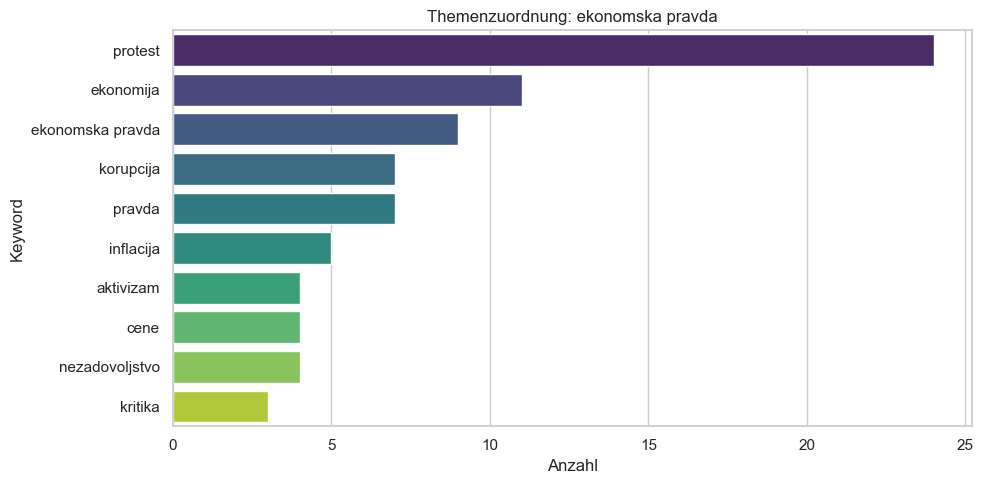

/var/folders/d4/m904nxmj7xvfqv1b0w3gf8d40000gp/T/ipykernel_3774/2844377367.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


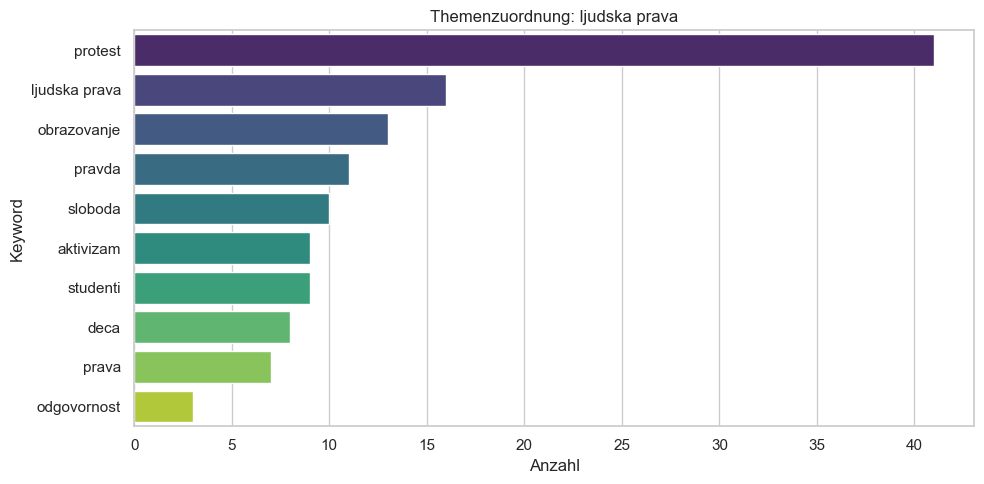

/var/folders/d4/m904nxmj7xvfqv1b0w3gf8d40000gp/T/ipykernel_3774/2844377367.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


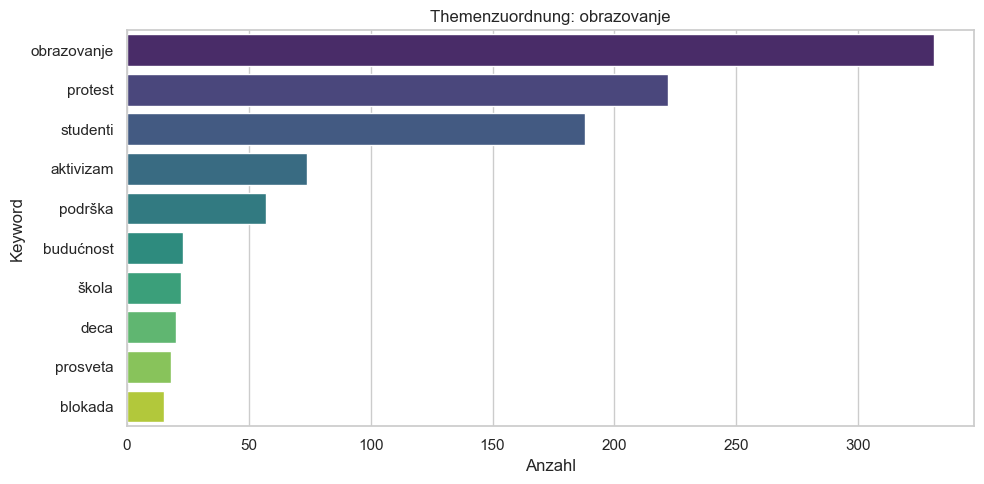

/var/folders/d4/m904nxmj7xvfqv1b0w3gf8d40000gp/T/ipykernel_3774/2844377367.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


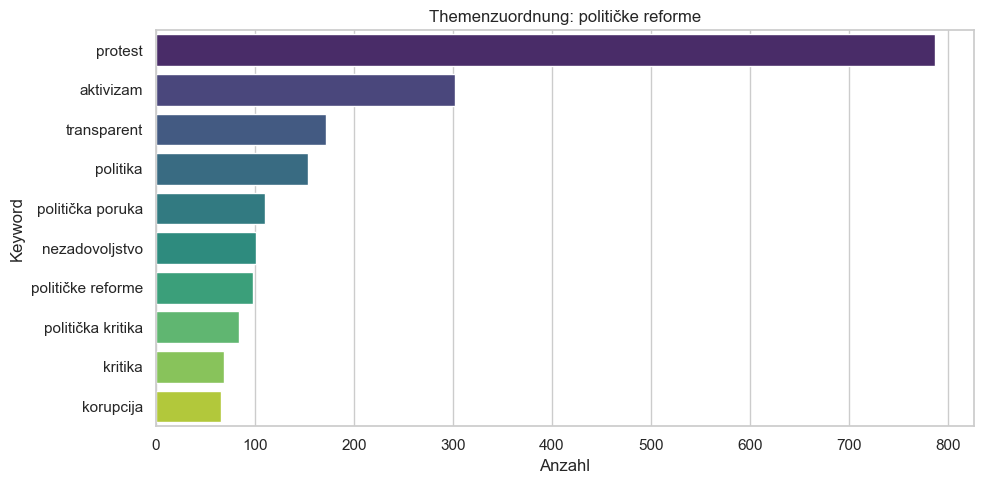

/var/folders/d4/m904nxmj7xvfqv1b0w3gf8d40000gp/T/ipykernel_3774/2844377367.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


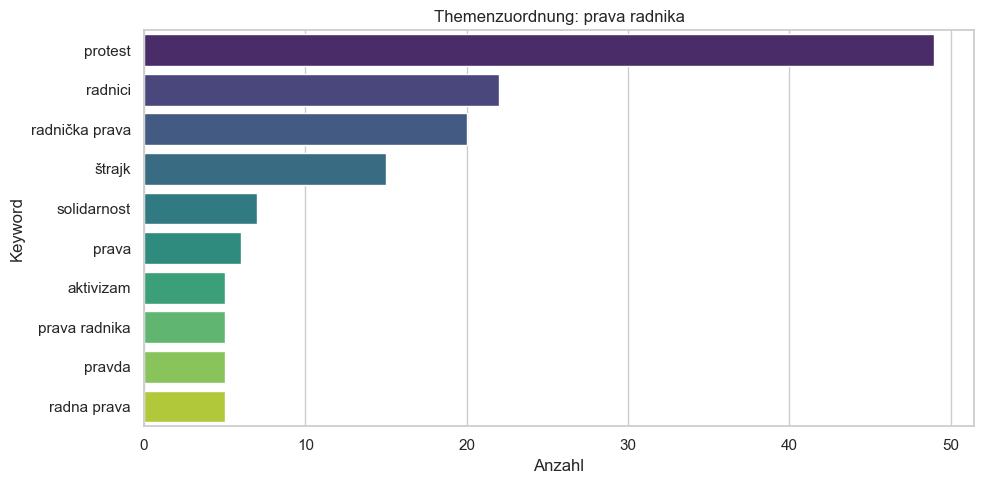

/var/folders/d4/m904nxmj7xvfqv1b0w3gf8d40000gp/T/ipykernel_3774/2844377367.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


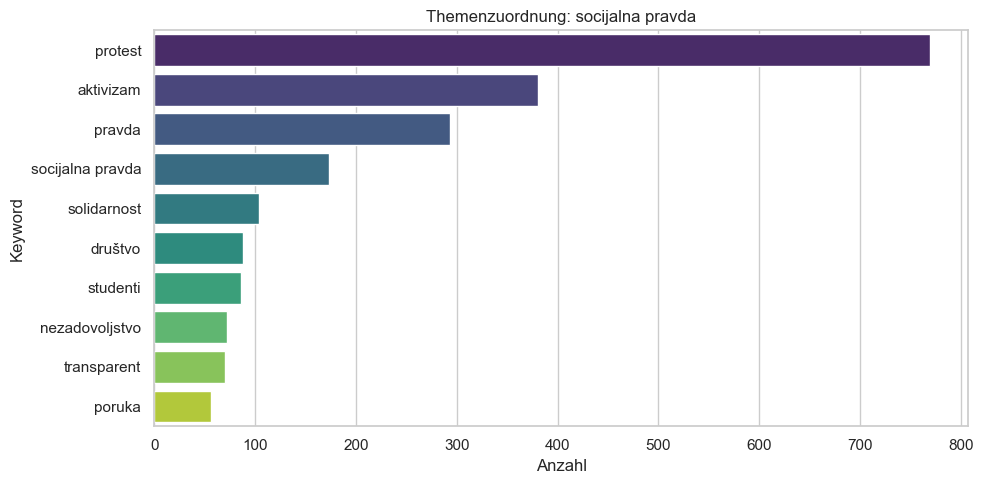

/var/folders/d4/m904nxmj7xvfqv1b0w3gf8d40000gp/T/ipykernel_3774/2844377367.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


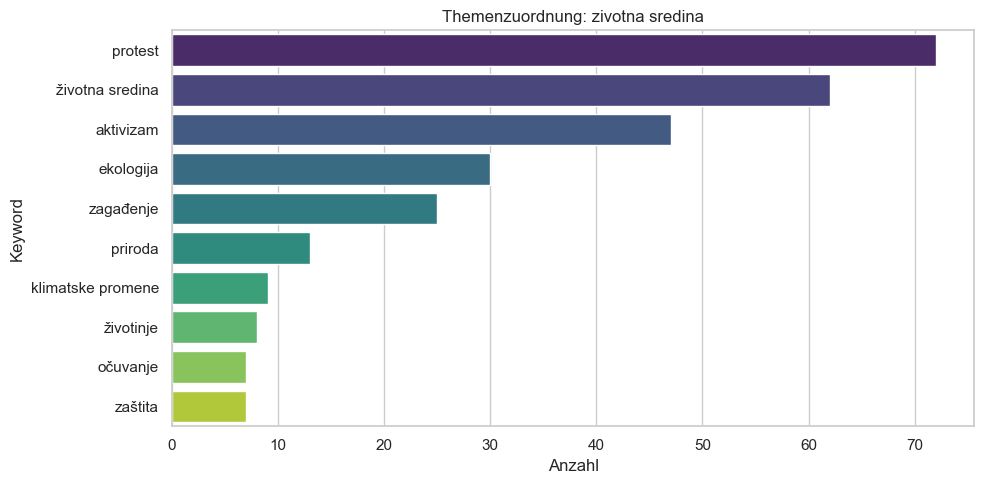

In [ ]:
import pandas as pd
import re
from transliterate import translit
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# CSV laden
df = pd.read_csv("/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/plakatdaten_mit_inhalt.csv")

# Nur Top-7 Kategorien für Vergleichbarkeit
top7 = df["Kategorie_konsolidiert"].value_counts().nlargest(7).index.tolist()
df = df[df["Kategorie_konsolidiert"].isin(top7)]

# Stopwortlisten laden
stopword_pfad = "/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/stopwords-hr.txt"
with open(stopword_pfad, "r", encoding="utf-8") as f:
    stopwords_sr = set(line.strip().lower() for line in f if line.strip())

stopwords_en = set(stopwords.words("english"))
stopwords_kombi = stopwords_sr.union(stopwords_en)

# Keyword-Bereinigung
def bereinige_keyword(w):
    w = translit(w, "sr", reversed=True)
    w = w.lower()
    w = re.sub(r"[^\w\s]", "", w)
    return w.strip()

# Keywords extrahieren, bereinigen, stopwords filtern
df["keywords_liste"] = df["Stichworte"].fillna("").apply(lambda s: [bereinige_keyword(w) for w in s.split(",")])
df["keywords_bereinigt"] = df["keywords_liste"].apply(lambda ws: [w for w in ws if w and w not in stopwords_kombi])

# Für Zählung entfalten
df_keywords = df[["Kategorie_konsolidiert", "keywords_bereinigt"]].explode("keywords_bereinigt")

# Zählen
keyword_counts = (
    df_keywords.groupby(["Kategorie_konsolidiert", "keywords_bereinigt"])
    .size()
    .reset_index(name="Anzahl")
    .sort_values(["Kategorie_konsolidiert", "Anzahl"], ascending=[True, False])
)

# Abspeichern
keyword_counts.to_csv("/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/keyword_counts_pro_kategorie.csv", index=False)

# Visualisierung (Top 10 pro Kategorie)
top_keywords_per_category = (
    keyword_counts.groupby("Kategorie_konsolidiert")
    .head(10)
    .reset_index(drop=True)
)

sns.set(style="whitegrid")

for cat in top_keywords_per_category["Kategorie_konsolidiert"].unique():
    subset = top_keywords_per_category[top_keywords_per_category["Kategorie_konsolidiert"] == cat]
    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=subset,
        x="Anzahl",
        y="keywords_bereinigt",
        palette="viridis"
    )
    plt.title(f"Themenzuordnung: {cat}")
    plt.xlabel("Anzahl")
    plt.ylabel("Keyword")
    plt.tight_layout()
    plt.show()


#### Gemeinsame Darstellung

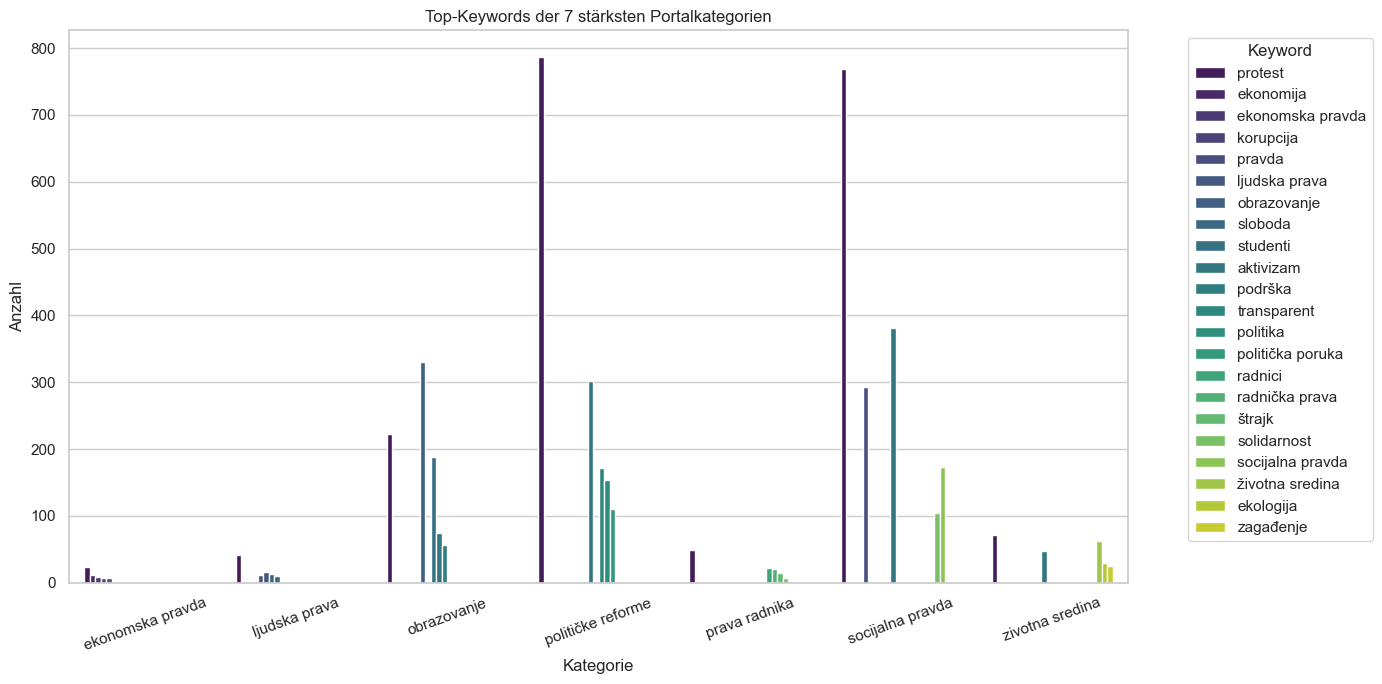

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot-Stil
sns.set_style("whitegrid")

# Themen
top7 = [
    "socijalna pravda",
    "političke reforme",
    "obrazovanje",
    "zivotna sredina",
    "ljudska prava",
    "prava radnika",
    "ekonomska pravda"
]

# Nur die Top-7-Kategorien
keyword_counts = keyword_counts[keyword_counts["Kategorie_konsolidiert"].isin(top7)]

# Top-5 Keywords je Kategorie extrahieren (für bessere Lesbarkeit)
top_keywords = (
    keyword_counts.groupby("Kategorie_konsolidiert")
    .head(5)
    .reset_index(drop=True)
)

# Lesbare Namen 
# top_keywords["Kategorie_konsolidiert"] = top_keywords["Kategorie_konsolidiert"].str.title()

# Balkendiagramm gruppiert
plt.figure(figsize=(14, 7))
sns.barplot(
    data=top_keywords,
    x="Kategorie_konsolidiert",
    y="Anzahl",
    hue="keywords_bereinigt",
    palette="viridis"
)

plt.title("Top-Keywords der 7 stärksten Portalkategorien")
plt.xlabel("Kategorie")
plt.ylabel("Anzahl")
plt.xticks(rotation=20)
plt.legend(title="Keyword", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Gegenüberstellung aller drei Zuweisungen

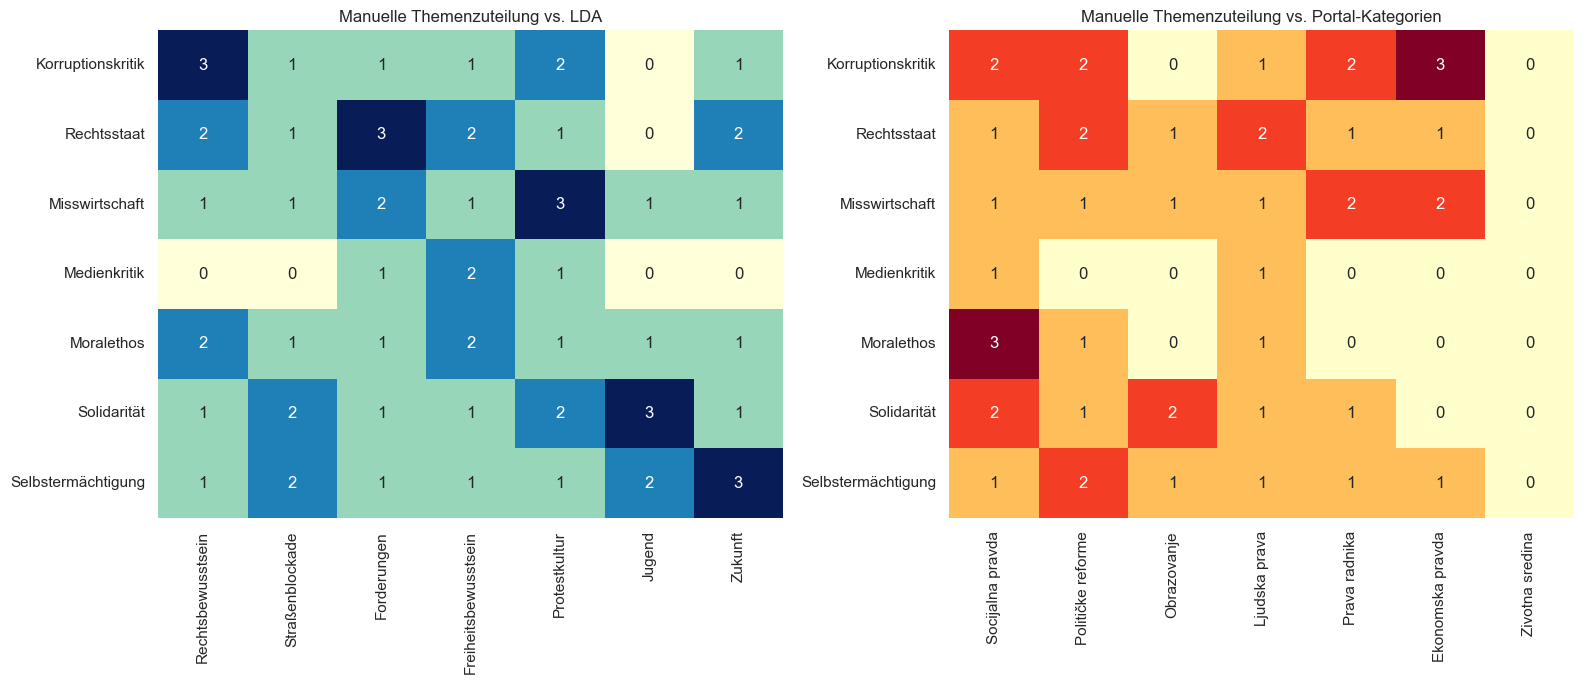

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Speicherpfad
output_dir = "/Users/annajouravel/Publikationen/In_Vorbereitung/Protestdiskurs_Serbien/protestdiskurs_serbien_latex/bilder"

# semantische Nähe: 3 = hoch, 2 = mittel, 1 = schwach (manuell zugeordnet)
# Zuweisung: Manuell vs. LDA
man_lda = pd.DataFrame({
    "Rechtsbewusstsein":      [3, 2, 1, 0, 2, 1, 1],
    "Straßenblockade":        [1, 1, 1, 0, 1, 2, 2],
    "Forderungen":            [1, 3, 2, 1, 1, 1, 1],
    "Freiheitsbewusstsein":   [1, 2, 1, 2, 2, 1, 1],
    "Protestkultur":          [2, 1, 3, 1, 1, 2, 1],
    "Jugend":                 [0, 0, 1, 0, 1, 3, 2],
    "Zukunft":                [1, 2, 1, 0, 1, 1, 3],
}, index=[
    "Korruptionskritik",
    "Rechtsstaat",
    "Misswirtschaft",
    "Medienkritik",
    "Moralethos",
    "Solidarität",
    "Selbstermächtigung"
])

# Zuweisung: Manuell vs. Portal
man_portal = pd.DataFrame({
    "Socijalna pravda":     [2, 1, 1, 1, 3, 2, 1],
    "Političke reforme":    [2, 2, 1, 0, 1, 1, 2],
    "Obrazovanje":          [0, 1, 1, 0, 0, 2, 1],
    "Ljudska prava":        [1, 2, 1, 1, 1, 1, 1],
    "Prava radnika":        [2, 1, 2, 0, 0, 1, 1],
    "Ekonomska pravda":     [3, 1, 2, 0, 0, 0, 1],
    "Zivotna sredina":      [0, 0, 0, 0, 0, 0, 0],
}, index=man_lda.index)

# Heatmaps nebeneinander
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.heatmap(man_lda, annot=True, fmt="d", cmap="YlGnBu", ax=axes[0], cbar=False)
axes[0].set_title("Manuelle Themenzuteilung vs. LDA")

sns.heatmap(man_portal, annot=True, fmt="d", cmap="YlOrRd", ax=axes[1], cbar=False)
axes[1].set_title("Manuelle Themenzuteilung vs. Portal-Kategorien")

plt.tight_layout()
plt.savefig(f"{output_dir}/vergleich_manuell_lda_portal.png", dpi=300)
plt.show()
